In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from category_encoders.target_encoder import TargetEncoder

In [65]:
def bin_column(column):
    categories = list(column.unique())
    d={i:[] for i in categories}
    for i in column:
        for j in list(d.keys()):
            if j==i:
                d[j]+=[1]
            else:
                d[j]+=[0]
    return d

In [66]:
data = pd.read_csv('student-mat.csv')

<Axes: xlabel='G3', ylabel='Count'>

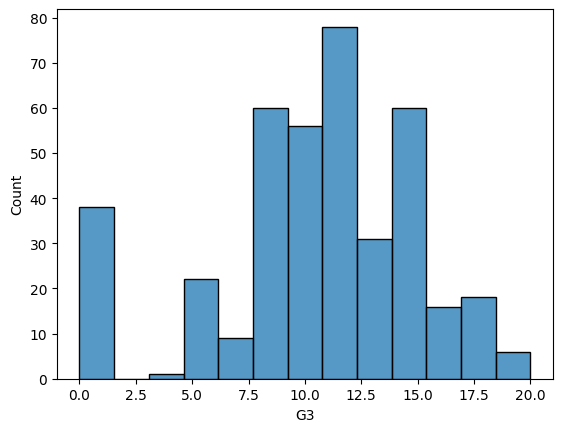

In [67]:
sns.histplot(data['G3'])

# Предобработка данных

In [68]:
data = data[data['G3'] != 0]

In [69]:
X = data.drop(columns=['G3'])
Y = data['G3']

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=37)

In [71]:
len(X_train)

320

In [72]:
len(X_test)

37

In [73]:
X_Y_train = X_train.copy(deep=True)
X_Y_train['y'] = Y_train
X_Y_train=X_Y_train.drop(['reason', 'guardian'],axis=1)

In [74]:
X_Y_train['school']=bin_column(X_Y_train['school'])['GP']
X_Y_train['gender']=bin_column(X_Y_train['gender'])['M']
X_Y_train['address']=bin_column(X_Y_train['address'])['U']
X_Y_train['famsize']=bin_column(X_Y_train['famsize'])['GT3']
X_Y_train['Pstatus']=bin_column(X_Y_train['Pstatus'])['A']
X_Y_train['schoolsup']=bin_column(X_Y_train['schoolsup'])['yes']
X_Y_train['famsup']=bin_column(X_Y_train['famsup'])['yes']
X_Y_train['paid']=bin_column(X_Y_train['paid'])['yes']
X_Y_train['nursery']=bin_column(X_Y_train['nursery'])['yes']
X_Y_train['higher']=bin_column(X_Y_train['higher'])['yes']
X_Y_train['internet']=bin_column(X_Y_train['internet'])['yes']
X_Y_train['romantic']=bin_column(X_Y_train['romantic'])['yes']
X_Y_train['activities']=bin_column(X_Y_train['activities'])['yes']
X_Y_train['Pedu']=(X_Y_train['Fedu']+X_Y_train['Medu'])/2
X_Y_train=X_Y_train.drop(['Medu','Fedu'],axis=1)

mjob_target_encoder = TargetEncoder()
mjob_target_encoder.fit(X_Y_train['Mjob'], X_Y_train['y'])
X_Y_train['Mjob'] = mjob_target_encoder.transform(X_Y_train['Mjob'])

fjob_target_encoder = TargetEncoder()
fjob_target_encoder.fit(X_Y_train['Fjob'], X_Y_train['y'])
X_Y_train['Fjob'] = fjob_target_encoder.transform(X_Y_train['Fjob'])

schoolsup_target_encoder = TargetEncoder()
schoolsup_target_encoder.fit(X_Y_train['schoolsup'], X_Y_train['y'])
X_Y_train['schoolsup'] = schoolsup_target_encoder.transform(X_Y_train['schoolsup'])

higher_target_encoder = TargetEncoder()
higher_target_encoder.fit(X_Y_train['higher'], X_Y_train['y'])
X_Y_train['higher'] = higher_target_encoder.transform(X_Y_train['higher'])

In [75]:
corr = X_Y_train.corr()['y']

In [76]:
corr

school        0.083701
gender        0.103950
age          -0.125414
address       0.107891
famsize      -0.060461
Pstatus       0.021768
Mjob          0.218020
Fjob          0.173038
traveltime   -0.095514
studytime     0.107797
failures     -0.306694
schoolsup    -0.259975
famsup       -0.071084
paid         -0.034458
activities    0.052220
nursery       0.009928
higher        0.107097
internet      0.117302
romantic     -0.093007
famrel        0.047179
freetime     -0.021407
goout        -0.165276
health       -0.064298
absences     -0.198891
G1            0.890471
y             1.000000
Pedu          0.214490
Name: y, dtype: float64

In [77]:
corr = corr[abs(corr)>=0.1]

In [78]:
corr

gender       0.103950
age         -0.125414
address      0.107891
Mjob         0.218020
Fjob         0.173038
studytime    0.107797
failures    -0.306694
schoolsup   -0.259975
higher       0.107097
internet     0.117302
goout       -0.165276
absences    -0.198891
G1           0.890471
y            1.000000
Pedu         0.214490
Name: y, dtype: float64

In [79]:
useful=['age','address','Mjob','Fjob','traveltime','studytime','failures','schoolsup','higher','internet','goout','absences','G1','Pedu']
X_Y_train=X_Y_train[useful+['y']]

In [80]:
scaler = MinMaxScaler()
scaler.fit(X_Y_train.drop(['y'],axis=1))
X_train=scaler.transform(X_Y_train.drop(['y'],axis=1))

In [81]:
model = LinearRegression()

In [82]:
model.fit(X_train, Y_train)

LinearRegression()

In [83]:
model.score(X_train, Y_train)

0.8189560074663669

# Проверка на тестовой выборке

In [84]:
X_test=X_test.drop(['reason', 'guardian'],axis=1)
X_test['school']=bin_column(X_test['school'])['GP']
X_test['gender']=bin_column(X_test['gender'])['M']
X_test['address']=bin_column(X_test['address'])['U']
X_test['famsize']=bin_column(X_test['famsize'])['GT3']
X_test['Pstatus']=bin_column(X_test['Pstatus'])['A']
X_test['schoolsup']=bin_column(X_test['schoolsup'])['yes']
X_test['famsup']=bin_column(X_test['famsup'])['yes']
X_test['paid']=bin_column(X_test['paid'])['yes']
X_test['nursery']=bin_column(X_test['nursery'])['yes']
X_test['higher']=bin_column(X_test['higher'])['yes']
X_test['internet']=bin_column(X_test['internet'])['yes']
X_test['romantic']=bin_column(X_test['romantic'])['yes']
X_test['activities']=bin_column(X_test['activities'])['yes']
X_test['Pedu']=(X_test['Fedu']+X_test['Medu'])/2
X_test=X_test.drop(['Medu','Fedu'],axis=1)
X_test['Mjob'] = mjob_target_encoder.transform(X_test['Mjob'])
X_test['Fjob'] = fjob_target_encoder.transform(X_test['Fjob'])
X_test['schoolsup'] = schoolsup_target_encoder.transform(X_test['schoolsup'])
X_test['higher'] = higher_target_encoder.transform(X_test['higher'])
X_test=X_test[useful]

In [85]:
X_test = scaler.transform(X_test)

In [88]:
model.score(X_test, Y_test)

0.8519589518738133

# Интерпретация

In [89]:
model.coef_

array([-1.58291563,  0.26799737,  0.05708249, -0.14559158,  0.06385565,
        0.0206786 ,  0.24513802, -0.23252543, -0.44492276,  0.40876107,
       -0.38025614, -2.75610508, 13.75460053,  0.38208489])

In [91]:
for x, y in zip(useful, model.coef_):
    print(x, round(y, 2))

age -1.58
address 0.27
Mjob 0.06
Fjob -0.15
traveltime 0.06
studytime 0.02
failures 0.25
schoolsup -0.23
higher -0.44
internet 0.41
goout -0.38
absences -2.76
G1 13.75
Pedu 0.38
